### Treść zadania

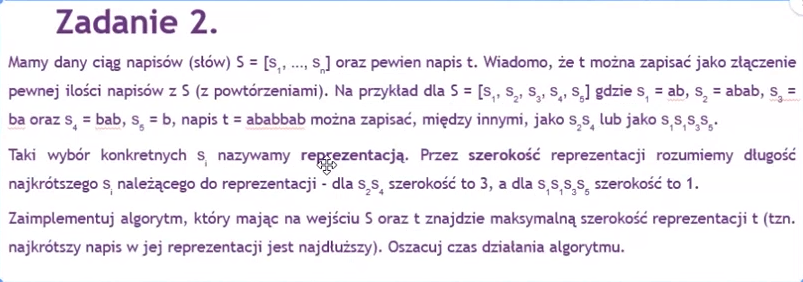

# Sposób I
#### (Wolniejszy i o większej złożoności pamięciowej)

### Omówienie

Dla każdego podciągu o indeksach $ i $ - $ j $ (włącznie), gdzie $ j \ge i $, wyznaczamy szerokość jego reprezentacji, a następnie, dla każdego kolejnego dłuższego podciągu, sprawdzamy, czy jest on podciągiem, który znajduje się w $ S $ (jeżeli tak, to bieżemy jego długość, bo ma on wówczas największą szerokość reprezentacji), a jeżeli nie, to badamy, czy da się go podzielić na takie 2 podciągi, które dało się podzielić wcześniej na inne podciągi, lub całe one były podciągami z tablicy $ S $. Jeżeli da się, aktualizujemy zapisaną szerokość reprezentacji dla danego podciągu $ i $ - $ j $ (wartość $ F[i][j] $) tylko wtedy, gdy znaleźliśmy podział tego podciągu na takie podciągi, że jego reprezentacja ma największą szerokość.

### Złożoność obliczeniowa

Przyjmijmy następujące założenia: <br>
$ n $ - długość napisu $ t $, <br>
$ m $ - liczba słów ze zbioru (w tablicy) $ S $.
<br><br>
Otrzymujemy wówczas złożoność:
$ O(m \cdot log(m)) $ - sortowanie tablicy $ S $, <br>
$ O(n^3 \cdot (n + m)) $ - samo przechodzenie trzema wskaźnikami $ i $, $ j $ i $ k $ pomiędzy $ i $ a $ j $ ma złożoność $ O(n^3) $. Przy każdym takim przejściu wycinamy jednak cały fragment $ i - j $ i porównujemy go z kolejnymi stringami ze zbioru $ S $. Pierwszy string znajdujemy w czasie $ O(log(m)) $, przy pomocy algorytmu Binary Search, na podstawie jego długości, ale jeżeli wszystkie stringi miałyby tę samą długość, musielibyśmy przejrzeć całą tablicę o długości $ m $ i każdy taki string porównać z naszym wycinkiem od $ i $ do $ j $. Otrzymujemy więc złożoność $ O(n \cdot m + log(m)) = O(n \cdot m) $ dla każego przejścia wskaźnikiem $ k $, a więc sumarycznie mamy $ O(n^3 \cdot (n \cdot m)) = O(n^4 \cdot m) $ dla całej funkcji rekurencyjnej.

###### Obliczeniowa
$ O(n^4 \cdot m) $
###### Pamięciowa
$ O(n^2) $ - uznaję, że tablica $ S $ jest dana i nie wliczam jej do złożoności

### Implementacja

#### Bottom-up

In [1]:
def binary_search(arr, length) -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if length > len(arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and len(arr[left_idx]) == length else -1


def longest_representation_length(t, S):
    n = len(t)
    F = [[0] * n for _ in range(n)]
    S.sort(key=len)
    
    # Fill a diagonal with values when a single character is a part
    # of S array
    for i in range(n):   
        j = 0
        while len(S[j]) == 1:
            if S[j] == t[i]:
                F[i][i] = len(S[j])
            j += 1
            
    for m in range(1, n):
        for i in range(n - m):
            j = i + m
            # Check if the current substring is a string of the S array
            substr = t[i:j + 1]
            length = len(substr)
            # Using a Binary Search find an index oft he first string of the
            # same length as the current substring
            idx = binary_search(S, length)
            # If there is a string in the S array of the desired length, loop
            # over all the strings of this length and check if any of them is the
            # same as the current substring
            if idx >= 0:
                k = idx
                while k < len(S) and len(S[k]) == length:
                    if S[k] == substr:
                        F[i][j] = length
                        break
                    k += 1
            
            # If not, look for a possible split of the substring to two shorter
            # substrings and choose the best split (the one which will result in the
            # largest width of the representation)
            if not F[i][j]:
                for k in range(i + 1, j + 1):
                    min_width = min(F[i][k - 1], F[k][j])
                    if F[i][k - 1] and F[k][j] and min_width > F[i][j]:
                        F[i][j] = min_width
                        print(t[i:k], t[k:j+1], F[i][j])
    
#     print(*F, sep='\n')

    return F[0][n - 1]

###### Kilka testów

In [2]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'ababbab'
print(longest_representation_length(t, S))

b b 1
ab b 1
b ba 1
b abb 1
ab ba 2
b bab 1
ab abb 1
b abba 1
bab ba 2
ab bab 2
ab abba 2
b abbab 1
bab bab 3
ab abbab 2
abab bab 3
3


### (Dodatkowo) Pobieranie najlepszej reprezentacji

In [3]:
def binary_search(arr, length) -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if length > len(arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and len(arr[left_idx]) == length else -1


def find_split_indices(P, i, j):
    if not P[i][j]: return [(i, j)]
    result = []
    
    stack = [(P[i][j], j), (0, P[i][j] - 1)]
    while stack:
        i, j = stack.pop()
        if P[i][j]:
            stack.append((i, P[i][j] - 1))
            stack.append((P[i][j], j))
        else:
            result.append((i, j))
    return result


def longest_representation_split(t, S):
    n = len(t)
    F = [[0] * n for _ in range(n)]
    # Create an array to hold split points (we will split a substring
    # into two substrings one of which ends obeforen stored index
    # (exclusive) and the second one will be the remaining part)
    P = [[0] * n for _ in range(n)]
    S.sort(key=len)
    
    # Fill a diagonal with values when a single character is a part
    # of S array
    for i in range(n):   
        j = 0
        while len(S[j]) == 1:
            if S[j] == t[i]:
                F[i][i] = len(S[j])
            j += 1
            
    for m in range(1, n):
        for i in range(n - m):
            j = i + m
            # Check if the current substring is a string of the S array
            substr = t[i:j + 1]
            length = len(substr)
            # Using a Binary Search find an index oft he first string of the
            # same length as the current substring
            idx = binary_search(S, length)
            # If there is a string in the S array of the desired length, loop
            # over all the strings of this length and check if any of them is the
            # same as the current substring
            if idx >= 0:
                k = idx
                while k < len(S) and len(S[k]) == length:
                    if S[k] == substr:
                        F[i][j] = length
                        break
                    k += 1
            
            # If not, look for a possible split of the substring to two shorter
            # substrings and choose the best split (the one which will result in the
            # largest width of the representation)
            if not F[i][j]:
                for k in range(i + 1, j + 1):
                    min_width = min(F[i][k - 1], F[k][j])
                    if F[i][k - 1] and F[k][j] and min_width > F[i][j]:
                        F[i][j] = min_width
                        P[i][j] = k
#                         print(t[i:k], t[k:j+1], F[i][j])

#     print(*F, sep='\n')
#     print()
#     print(*P, sep='\n')
    
    result = []
    for i, j in find_split_indices(P, 0, n-1):
        result.append(t[i:j + 1])
    
    return F[0][n - 1], result

Kilka testów

In [4]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'ababbab'
print(longest_representation_split(t, S))

(3, ['abab', 'bab'])


In [5]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'abababababababab'
print(longest_representation_split(t, S))

(4, ['abab', 'abab', 'abab', 'abab'])


# Sposób II
#### (Szybszy i o mniejszej złożoności pamięciowej)

### Omówienie

Nie trzeba rozważać wszystkich podicągów $ i $ - $ j $ ($ j \ge i $), ponieważ interesuje nas rozwiązanie dla całego ciągu tekstowego $ t $, a więc to, które zaczyna się w indeksie $ 0 $.

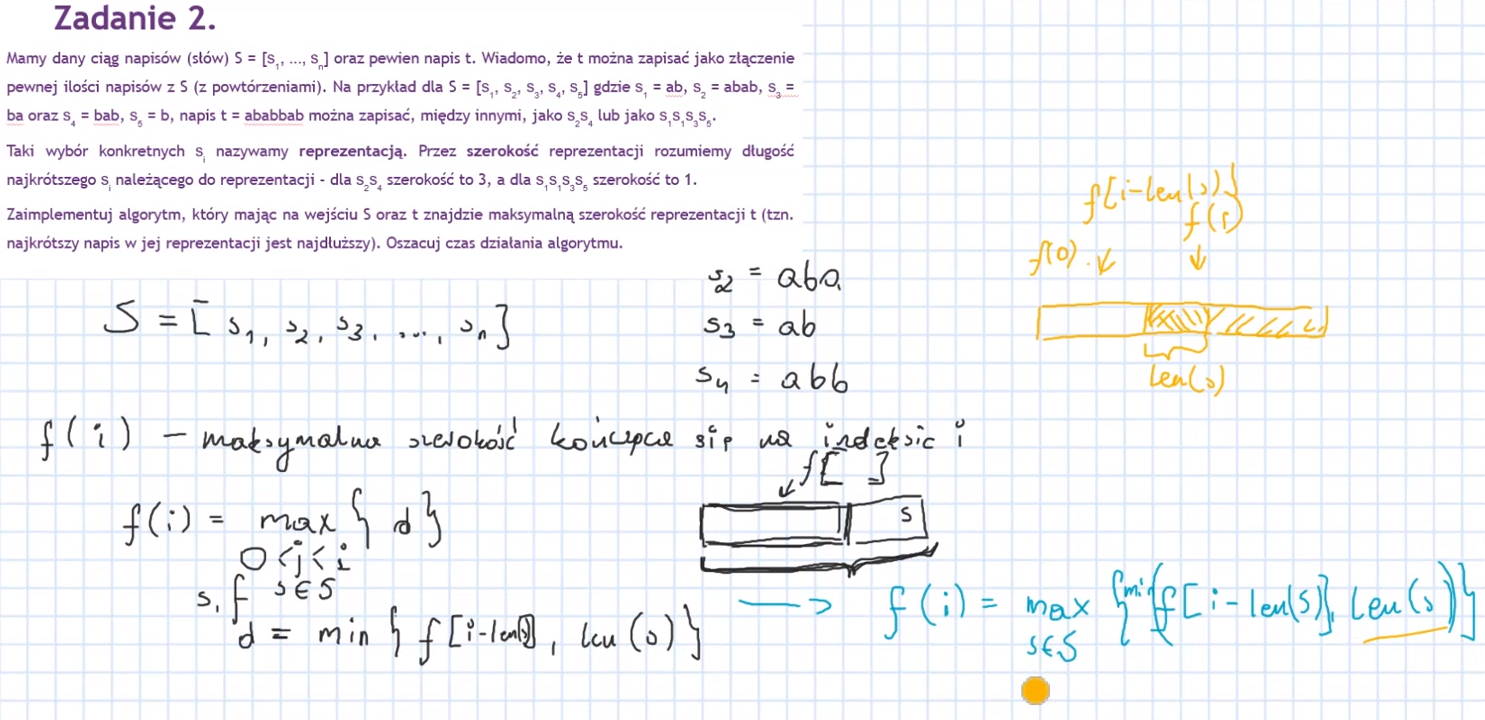

### Złożoność obliczeniowa

$ O(n^2 \cdot m) $ - przechodzimy głównym wskaźnikiem $ i $ po kolejnych indeksach stringu $ t $, a w każdym przejściu sprawdzamy, czy nowy fragment stringu $ t $ (od indeksu $ 0 $ do $ i $ włącznie) da się podzielić w taki sposób, żeby szerokość jego reprezentacji była większa niż poprzednio. W pętli porównujemy kolejne wycinki stringu $ t $ z kolejnymi elementami tablicy $ S $ (złożoność wszystkich porównań to $ O(n \cdot m) $ w jednym przebiegu głównej pętli.

### Implementacja

In [6]:
def longest_representation_length(t, S):
    n = len(t)
    F = [0] * (n + 1)
    # Filter out too long strings (longer than 't')
    S_cp = []
    for s in S:
        if len(s) <= n:
            S_cp.append(s)
    S = S_cp
    # Sort in order not to make unnecessary checks for too long strings
    S.sort(key=len)  # Bucket sort can be used
    
    for i in range(1, n + 1):
        j = 0
        # Check subsequent strings from the S array till they are no longer
        # than the current substring
        while j < len(S) and len(S[j]) <= i:
            substr = t[i - len(S[j]):i]
            if substr == S[j]:
                # If there is still some remaining part of a substring to check,
                # we have to assess whether the previous part has lower width
                # than the current one
                if i > len(substr):
                    F[i] = max(F[i], min(len(substr), F[i - len(substr)]))
                # If found a string of the same length as the current substring
                # and this substring is the whole substring we have already checked
                # (there are no other characters before this substring), we take this
                # substring as its representation ahs the largest width
                else:
                    F[i] = len(S[j])
                    break
            j += 1
        
#     print(F)

    return F[n]

###### Kilka testów

In [7]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'ababbab'
print(longest_representation_length(t, S))

3


### (Dodatkowo) Zwracanie rozwiązania

In [8]:
def prepare_strings(S, str_length):
     # Filter out too long strings (longer than 't')
    S_cp = []
    for s in S:
        if len(s) <= str_length:
            S_cp.append(s)
    # Sort in order not to make unnecessary checks for too long strings
    return sorted(S_cp)


def get_split_indices(t, P):
    res = []
    
    def recur(i):
        if i > 0: recur(P[i])
        res.append(i)
        return i
            
    recur(len(t))
    
    return res


def longest_representation_split(t, S):
    n = len(t)
    S = prepare_strings(S, n)
    F = [0] * (n + 1)
    P = [-1] * (n + 1)
    
    for i in range(1, n + 1):
        j = 0
        # Check subsequent strings from the S array till they are no longer
        # than the current substring
        while j < len(S) and len(S[j]) <= i:
            substr = t[i - len(S[j]):i]
            if substr == S[j]:
                # If there is still some remaining part of a substring to check,
                # we have to assess whether the previous part has lower width
                # than the current one
                if i > len(substr):
                    min_width = min(len(substr), F[i - len(substr)])
                    if min_width > F[i]:
                        F[i] = min_width
                        P[i] = i - len(substr)
                # If found a string of the same length as the current substring
                # and this substring is the whole substring we have already checked
                # (there are no other characters before this substring), we take this
                # substring as its representation ahs the largest width
                else:
                    F[i] = len(S[j])
                    P[i] = 0
                    break
            j += 1
        
#     print(F)
#     print(P)
    
    res = []
    si = get_split_indices(t, P)
    for i in range(len(si) - 1):
        res.append(t[si[i]:si[i + 1]])
    
    return F[n], res

###### Kilka testów

In [9]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'ababbab'
print(longest_representation_split(t, S))

(3, ['abab', 'bab'])


In [10]:
s1 = 'ab'
s2 = 'abab'
s3 = 'ba'
s4 = 'bab'
s5 = 'b'

S = [s1, s2, s3, s4, s5]
t = 'abababababababab'
print(longest_representation_split(t, S))

(4, ['abab', 'abab', 'abab', 'abab'])
